In [1]:
block_lasso = read.csv('../results_summary/sim_block_lasso.txt', sep='\t')
block_elnet = read.csv('../results_summary/sim_block_elnet.txt', sep='\t')
block_rf = read.csv('../results_summary/sim_block_rf.txt', sep='\t')
block_compLasso = read.csv('../results_summary/sim_block_compLasso.txt', sep='\t')

block_lasso$method = rep('lasso', dim(block_lasso)[1])
block_elnet$method = rep('elnet', dim(block_elnet)[1])
block_rf$method = rep('rf', dim(block_rf)[1])
block_compLasso$method = rep('compLasso', dim(block_compLasso)[1])

In [2]:
dim(block_lasso)
dim(block_elnet)
dim(block_rf)
dim(block_compLasso)

[1] 80 14

[1] 80 14

[1] 80 16

[1] 80 14

In [3]:
block_rf = block_rf[!names(block_rf)%in% c('OOB', 'OOB_mean', 'blockex')]
dim(block_rf)

[1] 80 14

In [4]:
block = rbind(block_lasso, block_elnet)
block = rbind(block, block_rf)
block = rbind(block, block_compLasso)
dim(block)

[1] 320  14

In [5]:
# fix false positives: when nothing was selected, then fp should be zero
# fp is now 1 due to length(setdiff(0/NA)) = 1 when actually should be 0 (in cv_sim_apply.R)
block$FP_mean[block$num_select ==0] = 0
write.table(block, '../results_summary/table_block_all.txt', sep='\t', row.names=F)

In [6]:
block[order(block$N, block$P, decreasing=T), c('N', 'P', 'method', 'Stab', 'MSE_mean', 'FP_mean', 'FN_mean', 'FDR')][1:20, ]

,N,P,method,Stab,MSE_mean,FP_mean,FN_mean,FDR
16,1000,1000,lasso,0.17,0.30,13.40,2.77,0.47
32,1000,1000,lasso,0.51,0.27,6.69,0.00,0.41
48,1000,1000,lasso,0.53,0.27,6.36,0.00,0.39
64,1000,1000,lasso,0.65,0.28,4.14,0.00,0.27
80,1000,1000,lasso,0.60,0.28,4.93,0.00,0.31
96,1000,1000,elnet,0.05,0.29,71.60,1.50,0.90
112,1000,1000,elnet,0.13,0.27,39.20,0.00,0.83
128,1000,1000,elnet,0.14,0.27,35.40,0.00,0.82
144,1000,1000,elnet,0.14,0.27,36.80,0.00,0.81
160,1000,1000,elnet,0.13,0.27,38.70,0.00,0.82


### data visulization

In [7]:
library(ggplot2)
block$N = as.factor(block$N)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### Correlation 0.1

In [8]:
block_sub1 = block[block$Corr %in% 0.1, ]

fig_num_select <- ggplot(block_sub1, aes(fill=method, y=num_select, x=N)) + 
                    geom_bar(position="dodge", stat="identity") + 
                    ggtitle("Block Correlation 0.1") + xlab("Number of Samples") + ylab("Number of Selected Features") + 
                    theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                    facet_grid(~P, labeller = label_both) + ylim(0, 65) + 
                    scale_fill_brewer(palette="Dark2", name="Method",
                                      breaks=c("compLasso", "elnet", "lasso", "rf"),
                                      labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.1_num_select.pdf', height=5, width=5.5)

figt_stab <- ggplot(block_sub1, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.1") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.1_Stab.pdf', height=5, width=5.5)

fig_mse <- ggplot(block_sub1, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.1") + xlab("Number of Samples") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 3.5) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.1_MSE.pdf', height=5, width=5.5)

fig_FP <- ggplot(block_sub1, aes(fill=method, y=FP_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.1") + xlab("Number of Samples") + ylab("#False Positives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 72) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.1_FP.pdf', height=5, width=5.5)

fig_FN <- ggplot(block_sub1, aes(fill=method, y=FN_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.1") + xlab("Number of Samples") + ylab("#False Negatives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 6) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.1_FN.pdf', height=5, width=5.5)

Warning message:
“Removed 2 rows containing missing values (geom_bar).”

### Correlation 0.3

In [9]:
block_sub3 = block[block$Corr %in% 0.3, ]

fig_num_select <- ggplot(block_sub3, aes(fill=method, y=num_select, x=N)) + 
                    geom_bar(position="dodge", stat="identity") + 
                    ggtitle("Block Correlation 0.3") + xlab("Number of Samples") + ylab("Number of Selected Features") + 
                    theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                    facet_grid(~P, labeller = label_both) + ylim(0, 65) + 
                    scale_fill_brewer(palette="Dark2", name="Method",
                                      breaks=c("compLasso", "elnet", "lasso", "rf"),
                                      labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.3_num_select.pdf', height=5, width=5.5)

fig_stab <- ggplot(block_sub3, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.3") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.3_Stab.pdf', height=5, width=5.5)

fig_mse <- ggplot(block_sub3, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.3") + xlab("Number of Samples") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 3.5) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.3_MSE.pdf', height=5, width=5.5)

fig_FP <- ggplot(block_sub3, aes(fill=method, y=FP_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.3") + xlab("Number of Samples") + ylab("#False Positives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 72) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.3_FP.pdf', height=5, width=5.5)

fig_FN <- ggplot(block_sub3, aes(fill=method, y=FN_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.3") + xlab("Number of Samples") + ylab("#False Negatives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 6) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.3_FN.pdf', height=5, width=5.5)

### Correlation 0.5

In [10]:
block_sub5 = block[block$Corr %in% 0.5, ]

fig_num_select <- ggplot(block_sub5, aes(fill=method, y=num_select, x=N)) + 
                    geom_bar(position="dodge", stat="identity") + 
                    ggtitle("Block Correlation 0.5") + xlab("Number of Samples") + ylab("Number of Selected Features") + 
                    theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                    facet_grid(~P, labeller = label_both) + ylim(0, 65) + 
                    scale_fill_brewer(palette="Dark2", name="Method",
                                      breaks=c("compLasso", "elnet", "lasso", "rf"),
                                      labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.5_num_select.pdf', height=5, width=5.5)

fig_stab <- ggplot(block_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.5") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.5_Stab.pdf', height=5, width=5.5)

fig_mse <- ggplot(block_sub5, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.5") + xlab("Number of Samples") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 3.5) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.5_MSE.pdf', height=5, width=5.5)

fig_FP <- ggplot(block_sub5, aes(fill=method, y=FP_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.5") + xlab("Number of Samples") + ylab("#False Positives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 72) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.5_FP.pdf', height=5, width=5.5)

fig_FN <- ggplot(block_sub5, aes(fill=method, y=FN_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.5") + xlab("Number of Samples") + ylab("#False Negatives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 6) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.5_FN.pdf', height=5, width=5.5)

### Correlation 0.7

In [11]:
block_sub7 = block[block$Corr %in% 0.7, ]

fig_num_select <- ggplot(block_sub7, aes(fill=method, y=num_select, x=N)) + 
                    geom_bar(position="dodge", stat="identity") + 
                    ggtitle("Block Correlation 0.7") + xlab("Number of Samples") + ylab("Number of Selected Features") + 
                    theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                    facet_grid(~P, labeller = label_both) + ylim(0, 65) + 
                    scale_fill_brewer(palette="Dark2", name="Method",
                                      breaks=c("compLasso", "elnet", "lasso", "rf"),
                                      labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.7_num_select.pdf', height=5, width=5.5)

fig_stab <- ggplot(block_sub7, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.7") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.7_Stab.pdf', height=5, width=5.5)

fig_mse <- ggplot(block_sub7, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.7") + xlab("Number of Samples") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 3.5) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.7_MSE.pdf', height=5, width=5.5)

fig_FP <- ggplot(block_sub7, aes(fill=method, y=FP_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.7") + xlab("Number of Samples") + ylab("#False Positives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 72) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.7_FP.pdf', height=5, width=5.5)

fig_FN <- ggplot(block_sub7, aes(fill=method, y=FN_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.7") + xlab("Number of Samples") + ylab("#False Negatives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 6) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.7_FN.pdf', height=5, width=5.5)

### Correlation 0.9

In [13]:
block_sub9 = block[block$Corr %in% 0.9, ]

fig_num_select <- ggplot(block_sub9, aes(fill=method, y=num_select, x=N)) + 
                    geom_bar(position="dodge", stat="identity") + 
                    ggtitle("Block Correlation 0.9") + xlab("Number of Samples") + ylab("Number of Selected Features") + 
                    theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                    facet_grid(~P, labeller = label_both) + ylim(0, 65) + 
                    scale_fill_brewer(palette="Dark2", name="Method",
                                      breaks=c("compLasso", "elnet", "lasso", "rf"),
                                      labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.9_num_select.pdf', height=5, width=5.5)

fig_stab <- ggplot(block_sub9, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.9") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 1) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.9_Stab.pdf', height=5, width=5.5)

fig_mse <- ggplot(block_sub9, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.9") + xlab("Number of Samples") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 3.5) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.9_MSE.pdf', height=5, width=5.5)

fig_FP <- ggplot(block_sub9, aes(fill=method, y=FP_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.9") + xlab("Number of Samples") + ylab("#False Positives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 72) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.9_FP.pdf', height=5, width=5.5)

fig_FN <- ggplot(block_sub9, aes(fill=method, y=FN_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Block Correlation 0.9") + xlab("Number of Samples") + ylab("#False Negatives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 6) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_block_corr0.9_FN.pdf', height=5, width=5.5)

#### All together

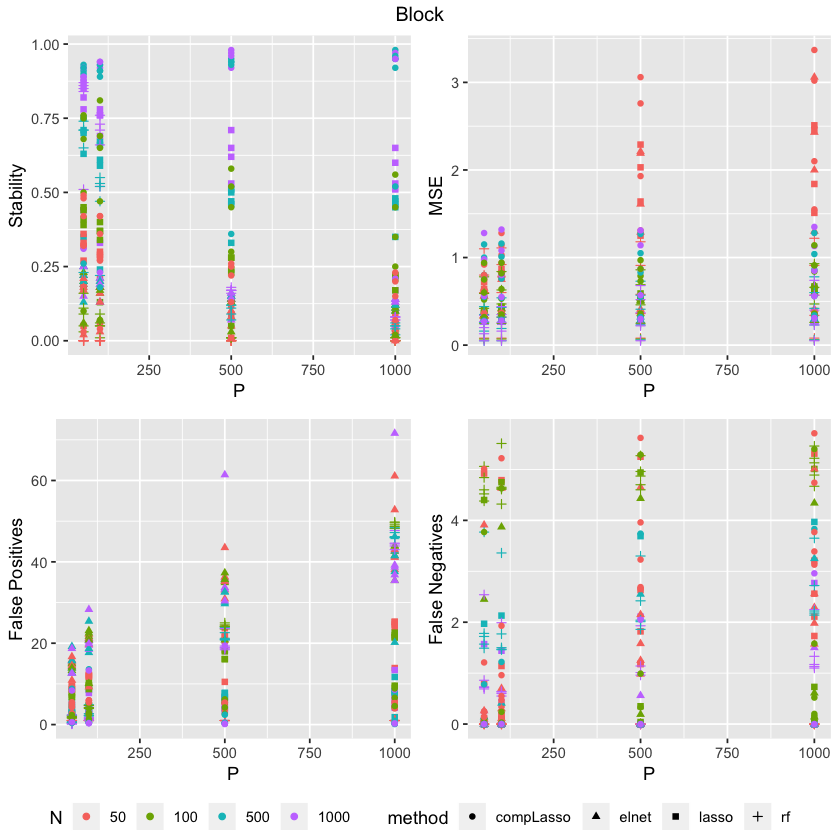

In [8]:
library(ggplot2)
library(ggpubr)
block$N = as.factor(block$N)
fig_block_stab = ggplot(block, aes(x=P, y=Stab, color=N)) + geom_point(aes(shape=method)) + ylab('Stability')
fig_block_mse = ggplot(block, aes(x=P, y=MSE_mean, color=N)) + geom_point(aes(shape=method)) + ylab('MSE')
fig_block_fp = ggplot(block, aes(x=P, y=FP_mean, color=N)) + geom_point(aes(shape=method)) + ylab('False Positives')
fig_block_fn = ggplot(block, aes(x=P, y=FN_mean, color=N)) + geom_point(aes(shape=method)) + ylab('False Negatives')
fig = ggarrange(fig_block_stab, fig_block_mse, fig_block_fp, fig_block_fn, ncol=2, nrow=2, 
          common.legend = TRUE, legend="bottom") 
fig = annotate_figure(fig, top = text_grob("Block"))
fig

In [9]:
ggexport(fig, filename = "../figures_sim/figure_block_summary.pdf", height=8, width=8)

file saved to ../figures_sim/figure_block_summary.pdf
